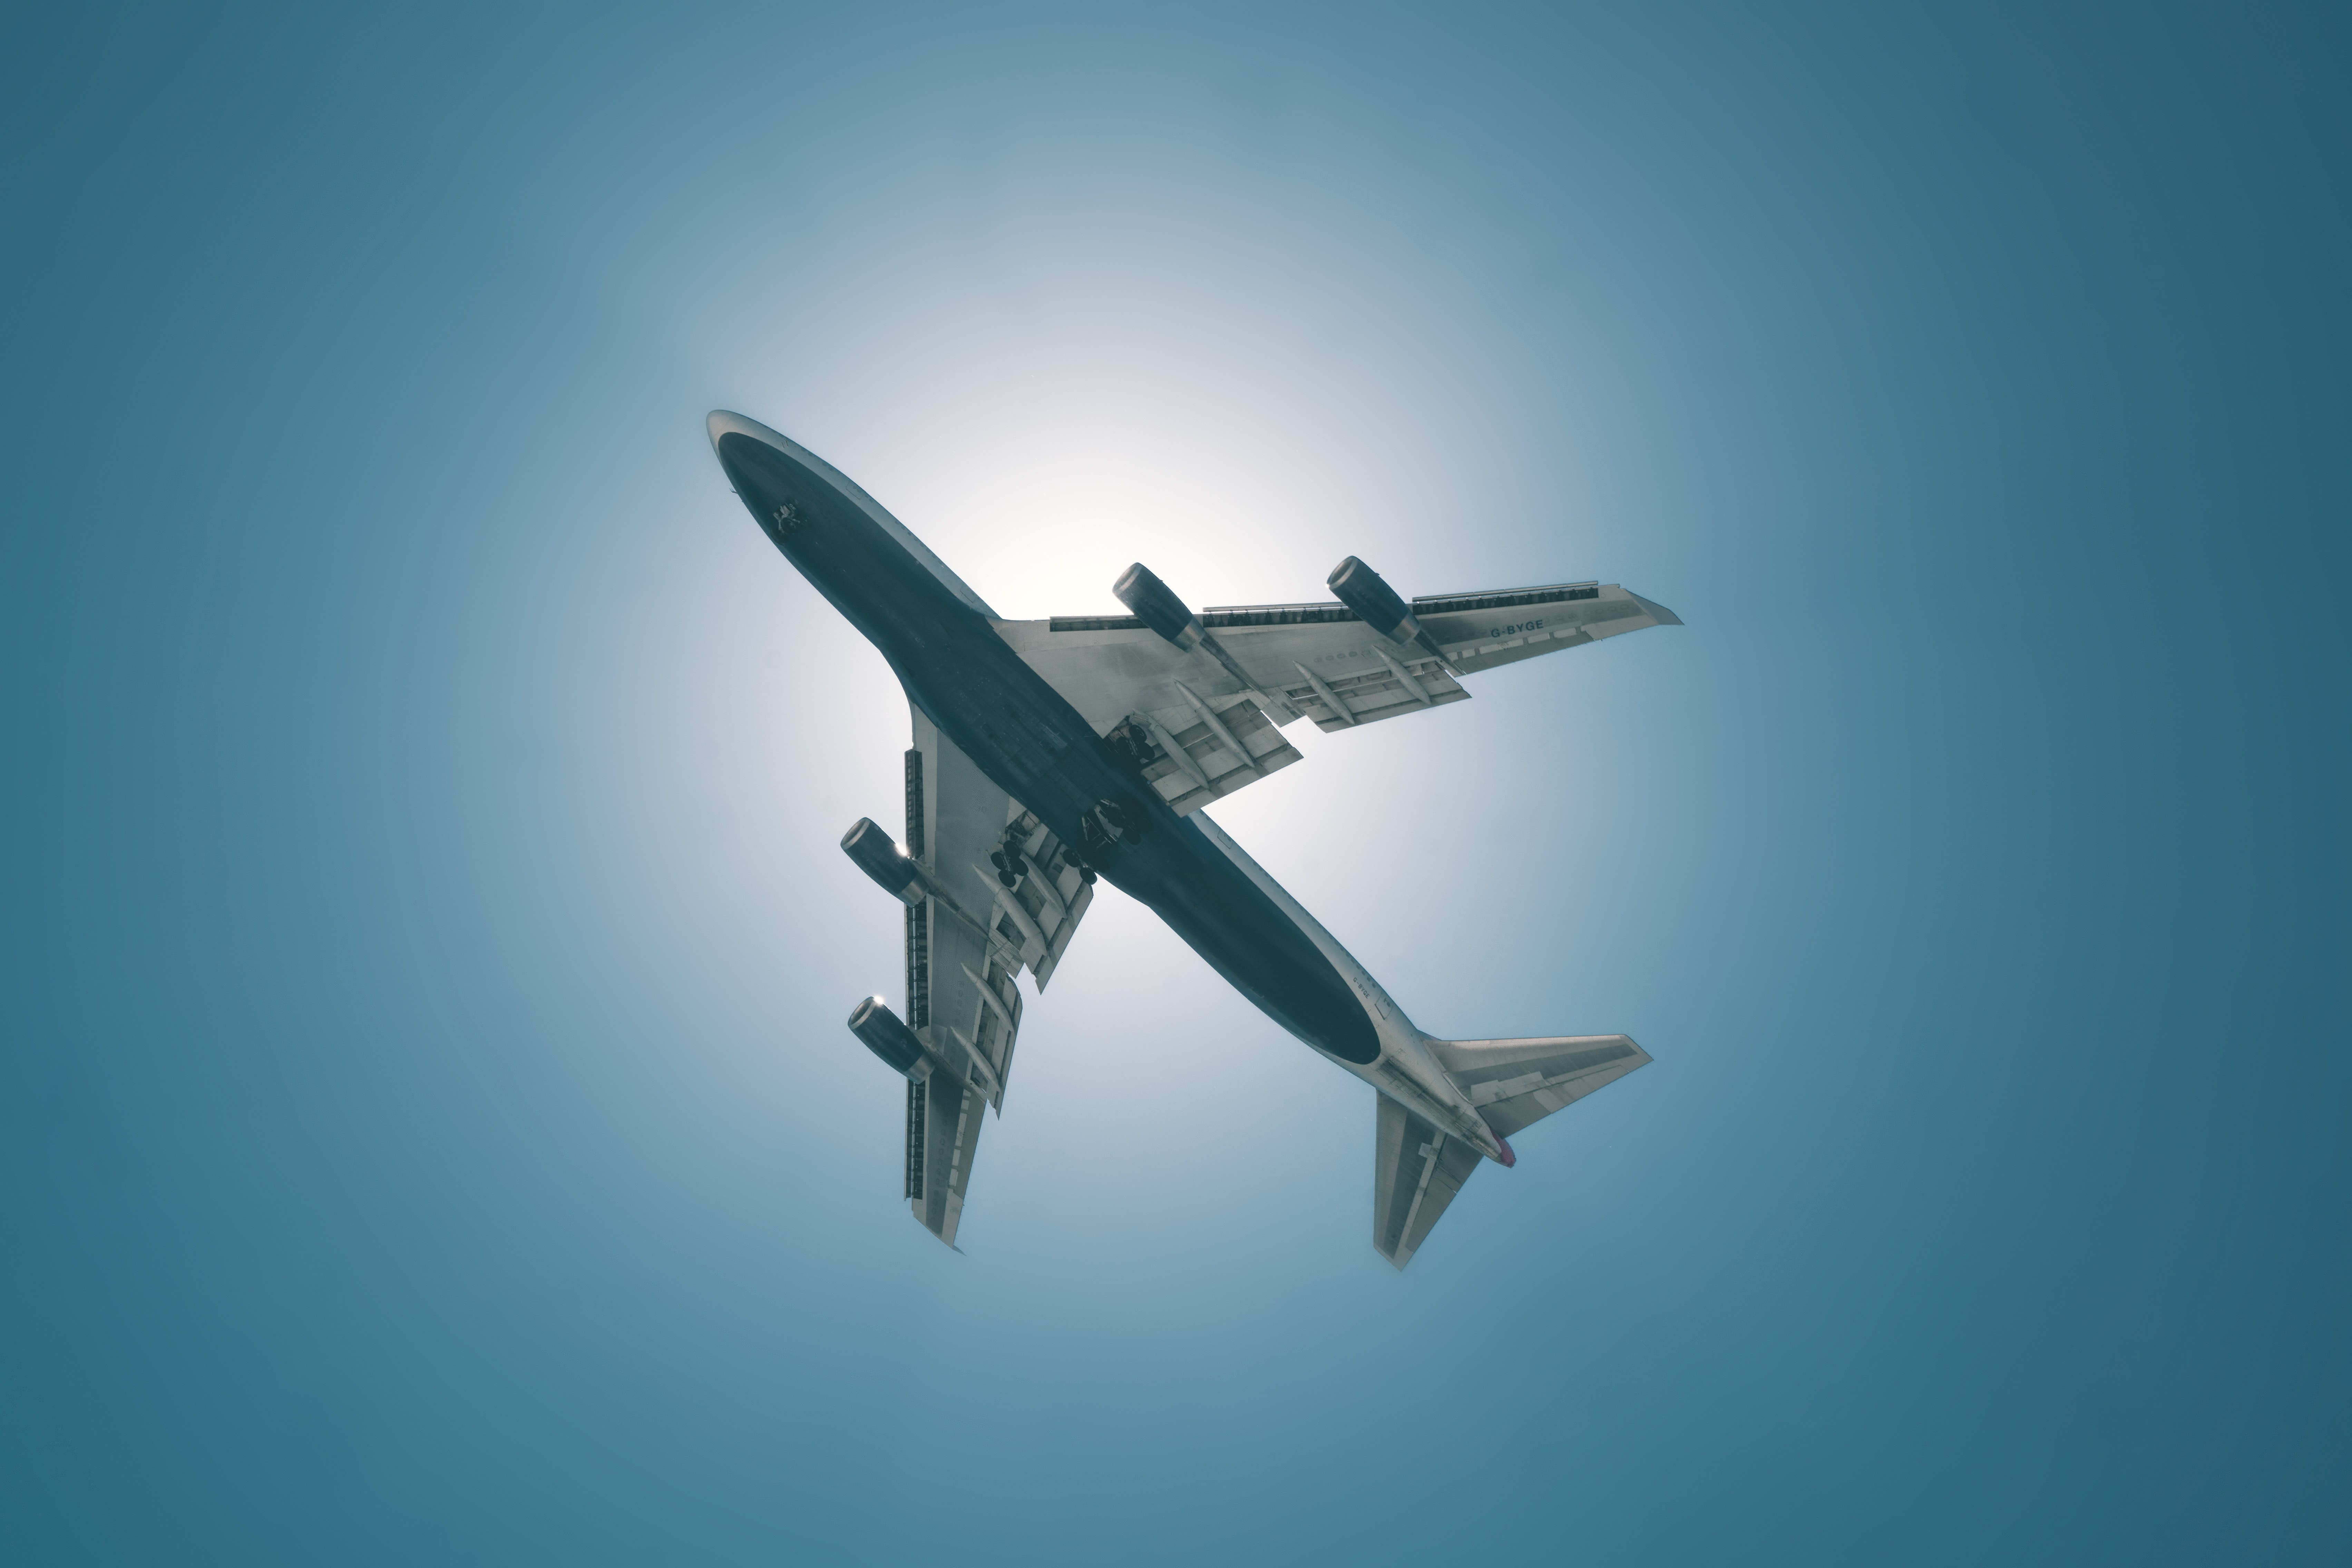

# Capstone Project: Airline Delays

Data analysis and machine learning with Python!

Wraps up Udemy course from Jose Portilla: Python for Data Science and Machine Learning Bootcamp

**March 13-15, 2023**

Garrett Becker

____
____
## Part 3: Decision Trees and Random Forests
____
____

____
## Imports and Setup
____

** Import modules **

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

** Import data **

In [2]:
df = pd.read_csv('airlines_delay.csv')

In [3]:
df.head()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2313.0,1296.0,141.0,DL,ATL,HOU,1,0
1,6948.0,360.0,146.0,OO,COS,ORD,4,0
2,1247.0,1170.0,143.0,B6,BOS,CLT,3,0
3,31.0,1410.0,344.0,US,OGG,PHX,6,0
4,563.0,692.0,98.0,FL,BMI,ATL,4,0


** Fix NaN values, if any **

In [4]:
df[df.isna().any(axis=1)]

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class


** Make dummy variables for airlines and airports **

In [5]:
airline_labels = ['Airline']
df = pd.get_dummies(df, columns=airline_labels, drop_first=False)

In [6]:
airportfrom_labels = ['AirportFrom']
df = pd.get_dummies(df, columns=airportfrom_labels, drop_first=False)

In [8]:
airportto_labels = ['AirportTo']
df = pd.get_dummies(df, columns=airportto_labels, drop_first=False)

In [9]:
df

,Flight,Time,Length,DayOfWeek,Class,Airline_9E,Airline_AA,Airline_AS,Airline_B6,Airline_CO,...,AirportTo_TXK,AirportTo_TYR,AirportTo_TYS,AirportTo_UTM,AirportTo_VLD,AirportTo_VPS,AirportTo_WRG,AirportTo_XNA,AirportTo_YAK,AirportTo_YUM
0,2313.0,1296.0,141.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6948.0,360.0,146.0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1247.0,1170.0,143.0,3,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,31.0,1410.0,344.0,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,563.0,692.0,98.0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539377,6973.0,530.0,72.0,5,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
539378,1264.0,560.0,115.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
539379,5209.0,827.0,74.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
539380,607.0,715.0,65.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539382 entries, 0 to 539381
Columns: 609 entries, Flight to AirportTo_YUM
dtypes: float64(3), int64(2), uint8(604)
memory usage: 331.3 MB


____
## Decision Trees
____

In [11]:
df.columns

Index(['Flight', 'Time', 'Length', 'DayOfWeek', 'Class', 'Airline_9E',
       'Airline_AA', 'Airline_AS', 'Airline_B6', 'Airline_CO',
       ...
       'AirportTo_TXK', 'AirportTo_TYR', 'AirportTo_TYS', 'AirportTo_UTM',
       'AirportTo_VLD', 'AirportTo_VPS', 'AirportTo_WRG', 'AirportTo_XNA',
       'AirportTo_YAK', 'AirportTo_YUM'],
      dtype='object', length=609)

In [12]:
x = df.drop(['Flight', 'Class'], axis=1)
y = df['Class']

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

** Training the data **

In [14]:
dtree = DecisionTreeClassifier()

In [15]:
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

** Predicting the testing data **

In [16]:
predictions = dtree.predict(x_test)

In [17]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.63      0.71      0.67     89424
           1       0.57      0.47      0.52     72391

    accuracy                           0.61    161815
   macro avg       0.60      0.59      0.59    161815
weighted avg       0.60      0.61      0.60    161815



In [18]:
print(confusion_matrix(y_test, predictions))

[[63724 25700]
 [38014 34377]]


____
## Decision Trees
____

** Training the data **

In [19]:
rfc = RandomForestClassifier(n_estimators=200)

In [20]:
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200)

** Predicting the testing data **

In [21]:
predictions = rfc.predict(x_test)

In [22]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.65      0.67      0.66     89424
           1       0.58      0.55      0.56     72391

    accuracy                           0.62    161815
   macro avg       0.61      0.61      0.61    161815
weighted avg       0.62      0.62      0.62    161815



In [23]:
print(confusion_matrix(y_test, predictions))

[[60200 29224]
 [32671 39720]]
